<a href="https://colab.research.google.com/github/Wakil02/mini-search-engine/blob/main/Mini_Search_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import string

In [6]:
from google.colab import drive
drive.mount('/content/drive')

graph_path = '/content/drive/My Drive/graph.csv'
content_path = '/content/drive/My Drive/content.csv'

Mounted at /content/drive


In [7]:
graph_df = pd.read_csv(graph_path)
content_df = pd.read_csv(content_path)

In [8]:
G = nx.DiGraph()
for _, row in graph_df.iterrows():
    G.add_edge(row['Source'], row['Target'])

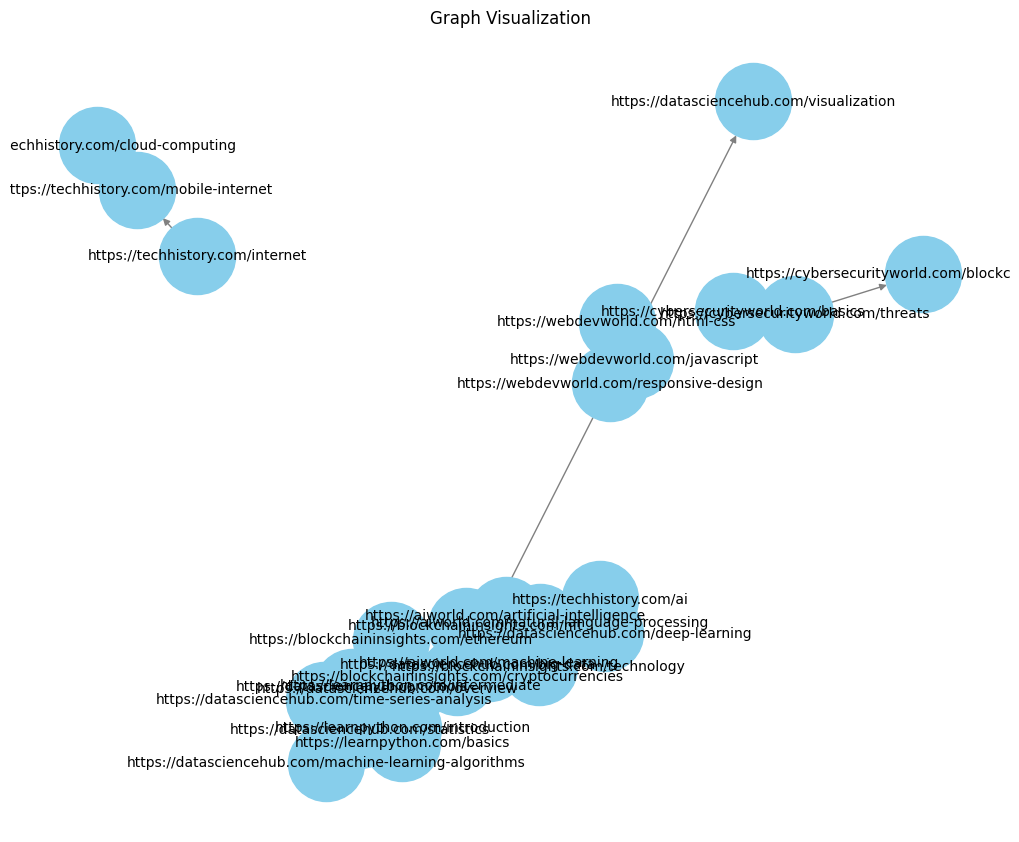

In [9]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=3000, font_size=10)
plt.title("Graph Visualization")
plt.show()

In [10]:
custom_stop_words = set([
    "a", "an", "the", "and", "or", "but", "if", "while", "in", "on", "at", "by", "for",
    "with", "about", "against", "between", "into", "through", "during", "before", "after",
    "above", "below", "to", "from", "up", "down", "over", "under", "again", "further",
    "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both",
    "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only",
    "own", "same", "so", "than", "too", "very", "can", "will", "just", "don", "should",
    "now", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had",
    "do", "does", "did", "doing", "would", "could", "should", "might", "must", "shall"
])

def custom_clean_content(text):
    tokens = text.split()
    cleaned_tokens = [
        word.strip(string.punctuation).lower()
        for word in tokens
        if word.lower() not in custom_stop_words and word.isalnum()
    ]
    return cleaned_tokens

content_df['Cleaned_Content'] = content_df['Content'].apply(custom_clean_content)

In [11]:
inverted_index = {}
for _, row in content_df.iterrows():
    url = row['URL']
    for word in row['Cleaned_Content']:
        if word not in inverted_index:
            inverted_index[word] = []
        inverted_index[word].append(url)

In [12]:
pagerank_scores = nx.pagerank(G)

def single_word_query(word):
    pages = inverted_index.get(word.lower(), [])
    ranked_pages = sorted(pages, key=lambda url: pagerank_scores.get(url, 0), reverse=True)
    return ranked_pages


In [13]:
query_word = "python"
results = single_word_query(query_word)
print(f"Results for '{query_word}': {results}")

Results for 'python': ['https://datasciencehub.com/tools', 'https://learnpython.com/basics', 'https://learnpython.com/basics', 'https://learnpython.com/introduction', 'https://learnpython.com/introduction']


In [14]:
def bag_of_words_query(words):
    pages = set()
    for word in words:
        pages.update(inverted_index.get(word.lower(), []))
    ranked_pages = sorted(pages, key=lambda url: pagerank_scores.get(url, 0), reverse=True)
    return ranked_pages


In [15]:
query_words = ["python", "data"]
results = bag_of_words_query(query_words)
print(f"Results for {query_words}: {results}")

Results for ['python', 'data']: ['https://datasciencehub.com/tools', 'https://datasciencehub.com/overview', 'https://learnpython.com/basics', 'https://learnpython.com/introduction']
